<a href="https://colab.research.google.com/github/labibaa/shongkhepon/blob/main/Copy_of_499B_finding_image_similarity_setting_threshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [ ]:
from email import generator
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import pathlib

import tensorflow as tf
import keras
from keras.layers import (Dense, Dropout, Flatten,GlobalAveragePooling2D)
#from tensorflow.keras.application.resnet50 import ResNet50
from keras.models import Sequential,Model
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
import keras.utils as image
#from keras.optimizers import Adam
import cv2
from IPython.display import HTML, display
from glob import glob
from PIL import Image
import time


In [ ]:
from keras.applications import ResNet50

**Loading dataset from directory**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_dir="/content/drive/MyDrive/Colab Notebooks/mrbean"
data_dir= tf.keras.utils.image_dataset_from_directory(dataset_dir,None,None)
#Function to define image size to be loaded into model
def get_img_size():
  img_size=(720,1280,3)
  return img_size

Found 14 files belonging to 1 classes.


# **Loading Resnet50 Model from Keras**

In [ ]:
#Function for loading resnet50 model from keras
def load_model():
  resnet_model=Sequential()
  model=ResNet50(include_top=False,
  input_shape=get_img_size(),
  weights='imagenet',
  pooling='avg',
  classes=None)
  return model

In [ ]:
#Loading model
model= load_model()
model.summary()

In [ ]:
def get_layers_list(model):
  layers_list = []
  for i in range(len(model.layers)):
      layer = model.layers[i]
      layers_list.append(layer.name)
  return layers_list

In [ ]:
layers_list = get_layers_list(model)
print("Architecture of the {} model:\n{}".format(model.name, layers_list))

Architecture of the resnet50 model:
['input_1', 'conv1_pad', 'conv1_conv', 'conv1_bn', 'conv1_relu', 'pool1_pad', 'pool1_pool', 'conv2_block1_1_conv', 'conv2_block1_1_bn', 'conv2_block1_1_relu', 'conv2_block1_2_conv', 'conv2_block1_2_bn', 'conv2_block1_2_relu', 'conv2_block1_0_conv', 'conv2_block1_3_conv', 'conv2_block1_0_bn', 'conv2_block1_3_bn', 'conv2_block1_add', 'conv2_block1_out', 'conv2_block2_1_conv', 'conv2_block2_1_bn', 'conv2_block2_1_relu', 'conv2_block2_2_conv', 'conv2_block2_2_bn', 'conv2_block2_2_relu', 'conv2_block2_3_conv', 'conv2_block2_3_bn', 'conv2_block2_add', 'conv2_block2_out', 'conv2_block3_1_conv', 'conv2_block3_1_bn', 'conv2_block3_1_relu', 'conv2_block3_2_conv', 'conv2_block3_2_bn', 'conv2_block3_2_relu', 'conv2_block3_3_conv', 'conv2_block3_3_bn', 'conv2_block3_add', 'conv2_block3_out', 'conv3_block1_1_conv', 'conv3_block1_1_bn', 'conv3_block1_1_relu', 'conv3_block1_2_conv', 'conv3_block1_2_bn', 'conv3_block1_2_relu', 'conv3_block1_0_conv', 'conv3_block1_3_c

In [ ]:
def get_layername_feature_extraction(model):
  layername_feature_extraction= 'predictions'
  return layername_feature_extraction

In [ ]:
img_size_model=get_img_size()
def image_processing(img_array):
  img= np.expand_dims(img_array,axis=0)
  processed_img=preprocess_input(img)
  return processed_img
#Function for predicting classtypes
def prediction(model,img_path,display_img=True):
  img_type=os.path.basename(img_path).split(".")[0]
  img = image.load_img(img_path, target_size=img_size_model)
  img_arr = np.array(img)
  img_ = image_processing(img_arr)

  predictions = model.predict(img_)
  predicted_class = predictions

  return predicted_class

In [ ]:
#setting indexes
idx1=0
idx2=1
idx3=2
idx4=3
idx5=4
idx6=5
idx7=6
idx8=7
idx9=8

In [ ]:
#Function for formulating image path of each image from directory
def img_pathfinder(index):
  img_dir='/content/drive/MyDrive/Colab Notebooks/mrbean'
  img_path_list=['frame0-00-00.00.jpg','frame0-00-01.00.jpg','frame0-00-02.00.jpg', 'frame0-00-03.00.jpg','frame0-00-04.00.jpg','frame0-00-10.00.jpg','frame0-00-30.00.jpg','frame0-00-50.00.jpg','frame0-01-00.00.jpg']
  img_path=os.path.join(img_dir,img_path_list[index])
  return img_path

In [ ]:
#Function to convert images into numpy array
def preprocess_img(index):
  img_size_model = get_img_size()
  img_path=img_pathfinder(index)
  img = image.load_img(img_path, target_size=img_size_model)
  img_path_list=['frame0-00-00.00.jpg','frame0-00-01.00.jpg','frame0-00-02.00.jpg', 'frame0-00-03.00.jpg','frame0-00-04.00.jpg','frame0-00-10.00.jpg','frame0-00-30.00.jpg','frame0-00-50.00.jpg','frame0-01-00.00.jpg']
  x_ = np.array(img)

  # Displaying the image
  plt.axis('off')
  plt.title(img_path_list[index])
  plt.imshow(x_/255.)

  # Expanding the shape
  x = np.expand_dims(x_, axis=0)
  # Converting image from RGB to BGR
  x = preprocess_input(x)
  print('Input image shape :', x.shape)


**Pre-processing each image frame**

Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)
Input image shape : (1, 720, 1280, 3)


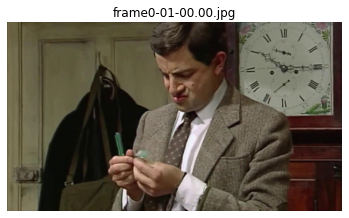

In [ ]:
img1=preprocess_img(idx1)
img2=preprocess_img(idx2)
img3=preprocess_img(idx3)
img4=preprocess_img(idx4)
img5=preprocess_img(idx5)
img6=preprocess_img(idx6)
img7=preprocess_img(idx7)
img8=preprocess_img(idx8)
img9=preprocess_img(idx9)


Input image shape : (1, 720, 1280, 3)


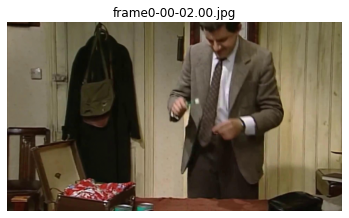

In [ ]:
img3=preprocess_img(idx3)

Input image shape : (1, 720, 1280, 3)


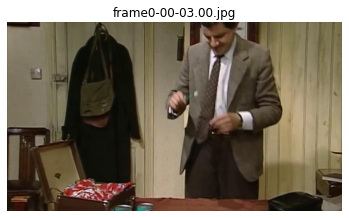

In [ ]:
img4=preprocess_img(idx4)

**Setting paths of each frame**

In [ ]:
img_path1=img_pathfinder(idx1)
img_path2=img_pathfinder(idx2)
img_path3=img_pathfinder(idx3)
img_path4=img_pathfinder(idx4)
img_path5=img_pathfinder(idx5)
img_path6=img_pathfinder(idx6)
img_path7=img_pathfinder(idx7)
img_path8=img_pathfinder(idx8)
img_path9=img_pathfinder(idx9)

**Running each frame through model**

In [ ]:
predicted_class1 = prediction(model, img_path1, display_img=True)
predicted_class2 = prediction(model, img_path2, display_img=True)
predicted_class3 = prediction(model, img_path3, display_img=True)
predicted_class4 = prediction(model, img_path4, display_img=True)
predicted_class5 = prediction(model, img_path5, display_img=True)
predicted_class6 = prediction(model, img_path6, display_img=True)
predicted_class7 = prediction(model, img_path7, display_img=True)
predicted_class8 = prediction(model, img_path8, display_img=True)
predicted_class9 = prediction(model, img_path9, display_img=True)

1/1 [==============================] - 2s 2s/step


In [ ]:
#Function to add extra layers of networks from resnet50 to the frames
def layers() :
 img_type=os.path.basename(img_path1).split(".")[0]
 img = image.load_img(img_path1, target_size=img_size_model)
 img_arr = np.array(img)
 img_ = image_processing(img_arr)

 x=img_
 p=img_
 y=GlobalAveragePooling2D()(x)
 p=Dense(128,activation='relu')
 a=Dense(5,activation='softmax')(x)
 model1=Model(inputs=model.input,outputs=model.output)

 return model1

# **Feature Extraction**

In [ ]:
#Function for feature extraction
def extract_feature_vectors(model,img_path):
  #creating new model instance without last layer
  model=layers()
  layername_feature_extraction=get_layername_feature_extraction(model)
  model_feature_vector=Model(inputs=model.input,outputs=model.layers[-1].output)
  img_size_model=get_img_size()
  img=image.load_img(img_path,grayscale=False,target_size=img_size_model)
  img_arr= np.array(img)
  img_=image_processing(img_arr)

  feature_vector=model_feature_vector.predict(img_)
  return feature_vector

In [ ]:
#Extracting features from images
feature_vector1=extract_feature_vectors(model,img_path1)
feature_vector2=extract_feature_vectors(model,img_path2)
feature_vector3=extract_feature_vectors(model,img_path3)
feature_vector4=extract_feature_vectors(model,img_path4)
feature_vector5=extract_feature_vectors(model,img_path5)
# feature_vector6=extract_feature_vectors(model,img_path6)
# feature_vector7=extract_feature_vectors(model,img_path7)
# feature_vector8=extract_feature_vectors(model,img_path8)
# feature_vector9=extract_feature_vectors(model,img_path9)


print (feature_vector1)
# print (feature_vector2)
# print (feature_vector3)
# print (feature_vector4)
# print (feature_vector5)
# print (feature_vector6)
# print (feature_vector7)
# print (feature_vector8)
# print (feature_vector9)

1/1 [==============================] - 3s 3s/step
[[0.09708142 0.5613237  0.05690644 ... 1.2726732  0.68749017 0.40369862]]


In [ ]:
print (feature_vector2)
print (feature_vector3)
print (feature_vector4)
print (feature_vector5)

[[0.11029615 0.6639441  0.05210519 ... 1.2567073  0.69607306 0.3080935 ]]
[[0.09929534 0.55836487 0.04924945 ... 1.2463999  0.6874548  0.3829428 ]]
[[0.11241987 0.5163534  0.05455617 ... 1.2519228  0.6999976  0.4272303 ]]
[[0.12517172 0.6159827  0.09002692 ... 1.1909442  0.73097855 0.3995165 ]]


**Feature Vector Extraction from images**

In [ ]:
def print_vectorProp(feature_vector):
  print_all = False # print the whole vector [vgg16 -> 1x4096, resnet50 -> 1x2048]
  #for i in feature_vector:
  print('Feature vector shape:', feature_vector[0].shape)

  if print_all:
    np.set_printoptions(threshold=np.inf, suppress=True)
    print('Feature vector (all): {}'.format(feature_vector[0]))
    np.set_printoptions(threshold=0)
  else:
    print('Feature vector (truncated): {}'.format(feature_vector[0]))


In [ ]:
print_vectorProp(feature_vector1)
print_vectorProp(feature_vector2)
# print_vectorProp(feature_vector3)
# print_vectorProp(feature_vector4)
# print_vectorProp(feature_vector5)
# print_vectorProp(feature_vector6)
# print_vectorProp(feature_vector7)
# print_vectorProp(feature_vector8)
# print_vectorProp(feature_vector9)

Feature vector shape: (2048,)
Feature vector (truncated): [0.09708142 0.5613237  0.05690644 ... 1.2726732  0.68749017 0.40369862]
Feature vector shape: (2048,)
Feature vector (truncated): [0.11029615 0.6639441  0.05210519 ... 1.2567073  0.69607306 0.3080935 ]


In [ ]:
#Function for generating feature maps of each frame for specified layer
def get_feature_maps(model, layer_idxs, img_path):
  img_size_model = get_img_size()
  img = image.load_img(img_path, target_size=img_size_model)
  img_arr = np.array(img)
  img_ = image_processing(img_arr)
  output_model = [model.layers[i].output for i in layer_idxs]

  #Creating a new keras model instance with specific layers
  model_feature_maps = Model(inputs=model.input, outputs=output_model)
  feature_maps = model_feature_maps.predict(img_)

  return feature_maps

In [ ]:
#Function for displaying feature maps
def show_feature_maps(model, feature_maps, idx):
  square = 8
  block = 0
  layers_list = get_layers_list(model)
  feature_maps_ = []
  if len(feature_maps) == 1:
    feature_maps_.append(feature_maps)
  else:
    feature_maps_ = feature_maps
  for fmap in feature_maps_:
    ix=1
    blockname= layers_list[idx[block]].split("_")[0]
    fig=plt.figure()
    fig.suptitle("Feature maps extracted from {} in the Resnet50 model".format(blockname), fontsize=13)

  for _ in range(square):
            for _ in range(square):
                ax = plt.subplot(square, square, ix)
                ax.set_xticks([])
                ax.set_yticks([])
                plt.imshow(fmap[0, :, :, ix-1], cmap = 'gray')
                ix += 1
  plt.show()
  block += 1

  if fmap is not feature_maps_[-1]:
    print("-"*100)

*Viewing the feature maps collected from certain frames*

In [ ]:
idx = [2]
feature_maps = get_feature_maps(model, idx, img_path1)
show_feature_maps(model,feature_maps,idx)
feature_maps2 = get_feature_maps(model, idx, img_path2)
show_feature_maps(model,feature_maps2,idx)
feature_maps3 = get_feature_maps(model, idx, img_path5)

1/1 [==============================] - 0s 222ms/step


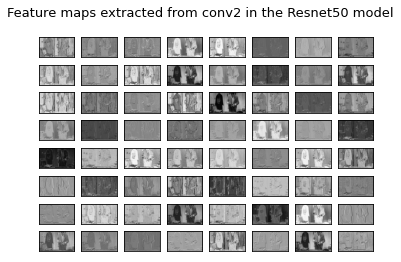

1/1 [==============================] - 0s 214ms/step


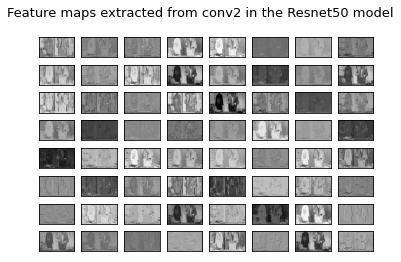

In [ ]:
idx = [10]
feature_maps = get_feature_maps(model, idx, img_path1)
show_feature_maps(model,feature_maps,idx)
feature_maps2 = get_feature_maps(model, idx, img_path2)
show_feature_maps(model,feature_maps2,idx)

1/1 [==============================] - 1s 811ms/step


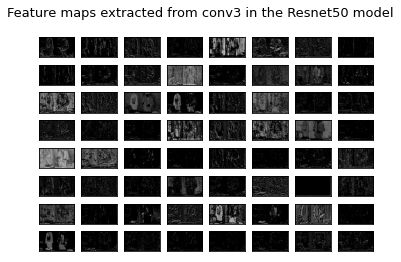

1/1 [==============================] - 1s 817ms/step


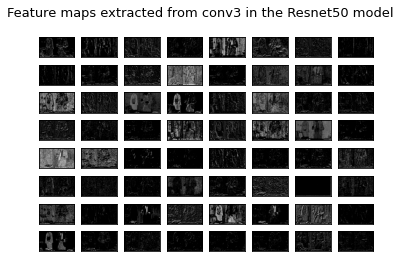

In [ ]:
idx = [50]
feature_maps = get_feature_maps(model, idx, img_path1)
show_feature_maps(model,feature_maps,idx)
feature_maps2 = get_feature_maps(model, idx, img_path5)
show_feature_maps(model,feature_maps2,idx)

# **Calculating similarity between frames using Eucledian distance**
Calculating euclidean distance between 2 feature vectors


In [ ]:
# calculating euclidean distance between vectors
from scipy.spatial.distance import euclidean
# calculate distance
dist1 = euclidean(feature_vector1[0], feature_vector2[0])
print(dist1)

2.082165002822876


In [ ]:
dist2= euclidean(feature_vector2, feature_vector3)
dist3= euclidean(feature_vector3, feature_vector4)
dist4= euclidean(feature_vector4, feature_vector5)
dist5= euclidean(feature_vector5, feature_vector6)
dist6= euclidean(feature_vector6, feature_vector7)
dist7= euclidean(feature_vector7, feature_vector8)
dist8= euclidean(feature_vector8, feature_vector9)

/usr/local/lib/python3.8/dist-packages/scipy/spatial/distance.py:300: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  u = np.asarray(u, dtype=dtype, order='c')


TypeError: ignored

Took the distances as an array with each combination two distances are comapared which means every four feature vector are compared. For now, the threshold is set as 5. If the difference exceeds 5, they are different

Formulating dataframes for visualization

In [ ]:

arr={'time_diff':[1,2,3,4],'distance':[dist1,dist2,dist3,dist4]}
df=pd.DataFrame(arr,columns=['distance','time diff'])
arr2={'time_diff':[10,50,100],'distance':[dist5,dist6,dist7,dist8]}
df2=pd.DataFrame(arr2,columns=['distance','time diff'])
arr3={'time_diff':[1,2,3,4,10,50,100],'distance':[dist1,dist2,dist3,dist4,dist5,dist6,dist7,dist8]}
df3=pd.DataFrame(arr3,columns=['distance','time diff'])


In [ ]:
plt.plot(df,color='red')
plt.xlabel("Time difference")
plt.ylabel("Euclidean Distance")
plt.title("Time difference between frames vs Euclidean Distance Graph")
plt.show()

In [ ]:
plt.plot(df2,color='red')
plt.xlabel("Time difference")
plt.ylabel("Euclidean Distance")
plt.title("Time difference between frames vs Euclidean Distance Graph")
plt.show()

In [ ]:
plt.plot(df3,color='red')
plt.xlabel("Time difference")
plt.ylabel("Euclidean Distance")
plt.title("Time difference between frames vs Euclidean Distance Graph")
plt.show()

In [ ]:
arr2=feature_vector1,feature_vector2,feature_vector3,feature_vector4,feature_vector5
#feature_vector6,feature_vector7,feature_vector8,feature_vector9
print(arr2)
# df1=[]
# for i in arr2:
#  df1.append(i[0])
# print(df1)

(array([[0.09708142, 0.5613237 , 0.05690644, ..., 1.2726732 , 0.68749017,
        0.40369862]], dtype=float32), array([[0.11029615, 0.6639441 , 0.05210519, ..., 1.2567073 , 0.69607306,
        0.3080935 ]], dtype=float32), array([[0.09929534, 0.55836487, 0.04924945, ..., 1.2463999 , 0.6874548 ,
        0.3829428 ]], dtype=float32), array([[0.11241987, 0.5163534 , 0.05455617, ..., 1.2519228 , 0.6999976 ,
        0.4272303 ]], dtype=float32), array([[0.12517172, 0.6159827 , 0.09002692, ..., 1.1909442 , 0.73097855,
        0.3995165 ]], dtype=float32))


In [ ]:
len(df1)

9

In [ ]:
print(df1[1][0])

[0.11029615 0.6639441  0.05210519 ... 1.2567073  0.69607306 0.3080935 ]


In [ ]:
for i in range(len(df1)-1):
    diff= euclidean(df1[i],df1[i+1])
i+=1
print(diff)

2.8428094387054443


In [ ]:
diff=[]
for i in enumerate(df1):
  if i==(len(df1)-1):
    break
  for j in range(len(df1)-1):
    diff.append(euclidean(df1[j][0],df1[j+1][0]))
    j+=1
print(diff)

[2.082165002822876, 2.1162326335906982, 2.1560070514678955, 2.7486770153045654, 2.7358005046844482, 10.40130615234375, 3.983025312423706, 2.8428094387054443, 2.082165002822876, 2.1162326335906982, 2.1560070514678955, 2.7486770153045654, 2.7358005046844482, 10.40130615234375, 3.983025312423706, 2.8428094387054443, 2.082165002822876, 2.1162326335906982, 2.1560070514678955, 2.7486770153045654, 2.7358005046844482, 10.40130615234375, 3.983025312423706, 2.8428094387054443, 2.082165002822876, 2.1162326335906982, 2.1560070514678955, 2.7486770153045654, 2.7358005046844482, 10.40130615234375, 3.983025312423706, 2.8428094387054443, 2.082165002822876, 2.1162326335906982, 2.1560070514678955, 2.7486770153045654, 2.7358005046844482, 10.40130615234375, 3.983025312423706, 2.8428094387054443, 2.082165002822876, 2.1162326335906982, 2.1560070514678955, 2.7486770153045654, 2.7358005046844482, 10.40130615234375, 3.983025312423706, 2.8428094387054443, 2.082165002822876, 2.1162326335906982, 2.1560070514678955

Threshold value

In [ ]:
arr3=[]
diff=[]
j=0
# print(df1)
# print(len(df1))
# print(df1[0])
# print(len(df1[0]))
# print(df1[0][0])
# print(len(df1[0][0]))
for i, frame_vector in enumerate(df1):
  print("i",i)
  if i == 8:
    break
  diff.insert(i,euclidean(frame_vector[0][i], frame_vector[0][i+1]))
  # diff.append(euclidean(frame_vector[i][0], frame_vector[i+1][0]))

  # j=0
  # for i in range(len(df1)-1):
  #   diff.insert(i,euclidean(df1[i],df1[i+1]))
  # j+=1
print("diff", diff)
# for i in arr3:
#  arr3[i]=arr2+(diff,)
# print(arr3)

i 0
i 1
i 2
i 3
i 4
i 5
i 6
i 7
i 8
diff [0.46424227952957153, 0.6118389368057251, 2.3170547485351562, 1.8948431015014648, 0.30538907647132874, 0.1482316255569458, 0.41317787766456604, 0.8345346450805664]


In [ ]:
print(df1[j][0])
len(df1[j][0])

[0.09708142 0.5613237  0.05690644 ... 1.2726732  0.68749017 0.40369862]


2048

In [ ]:
j=0
for j in df1[j][0]:
  j=0
  for i in range(len(df1)-1):
    diff.insert(i,euclidean(df1[i],df1[i+1]))
    print('1')
  j+=1
  print('3')
print(diff)

AttributeError: ignored

In [ ]:
arr3=[]
diff=[]
while i<=(len(df1)-1):
  diff.insert(i,euclidean(df1[i],df1[i+1]))
  i+=1
print(diff)

In [ ]:
meanv= np.mean(diff)
stddev= np.std(diff)
a=1
threshold= (meanv*a)+stddev
print(threshold)
selected_frames=[]
if meanv>threshold:
 selected_frames.append(diff)

In [ ]:
import itertools
lst = [dist1,dist2,dist3,dist4,dist5,dist6,dist7,dist8]
for a,b in itertools.combinations(lst, 2):
  if abs(a-b)<=5 :
    x=1
    print(x)  #print(a, '<' , b,'pretty similar' )
  else:
    x=0
    print(x)  #print(a, '<' , b,'different')



# pseudo code
> if x=1
extract the feature vectors (has to be in loop) from the 'a' and 'b'
Each feature vector has an image path (has to be in loop), so delete that image file (4 files?)



```
import glob
removing files = glob.glob('/content/drive/MyDrive/Colab Notebooks/mrbean/frame0-00-02.00.jpg')
for i in removing files:
    os.remove(i)
```



else save (maybe do nothing)